In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#link : https://archive.ics.uci.edu/ml/datasets/student+performance
data = pd.read_csv("/student-mat.csv",sep=";")

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.shape

(395, 33)

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

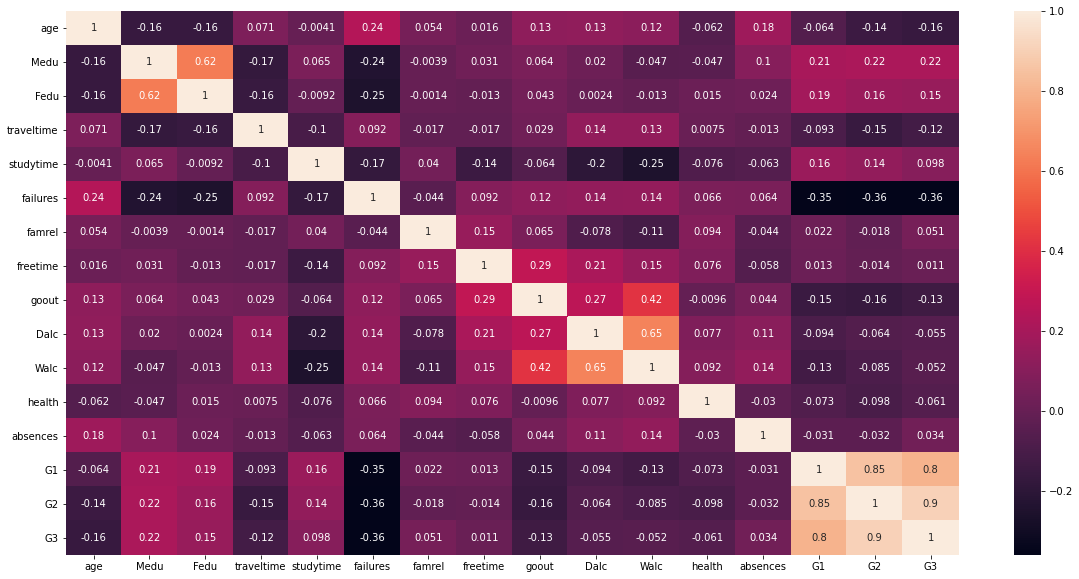

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10)) 
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,annot = True)


In [ ]:
#setting the features and target
target = data.G3
#Predicting without G1 but keeping G2
features = data.drop(["G3","G1"] , axis=1)
print("Feature values: \n {}".format(features.head()))

Feature values: 
   school sex  age address famsize  ... Dalc  Walc  health absences  G2
0     GP   F   18       U     GT3  ...    1     1       3        6   6
1     GP   F   17       U     GT3  ...    1     1       3        4   5
2     GP   F   15       U     LE3  ...    2     3       3       10   8
3     GP   F   15       U     GT3  ...    1     1       5        2  14
4     GP   F   16       U     GT3  ...    1     2       5        4  10

[5 rows x 31 columns]


In [ ]:
#One hot encoding for the categorical values

catfeatures = ["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian"]
yes_no_features = ["schoolsup","famsup", "paid","internet","activities","nursery","higher", "romantic"  ]

  
features = pd.get_dummies(features, columns=catfeatures)
features



,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,8,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,8,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,12,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
#binary encoding for the binary values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for i in yes_no_features:

  features[i]= enc.fit_transform(features[i])
features

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,8,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,16,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,8,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,12,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
#splitting the data to train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(276, 49)
(119, 49)


In [ ]:
#shortcut function to avoid repeatedly calling fit and score methods
def train_classifier(clf, X_train, y_train):
    print ("Training {}...".format(clf.__class__.__name__))
    clf.fit(X_train, y_train)

def predict_labels(clf, features, target):
    return clf.score(features, target)

def train_predict(clf, X_train, y_train, X_test, y_test):
    print ("------------------------------------------")
    train_classifier(clf, X_train, y_train)
    print ("Training set size: {}".format(len(X_train)))
    print ("Score for training set:")
    print(predict_labels(clf, X_train, y_train))
    print ("Score for test set:")
    print(predict_labels(clf, X_test, y_test))

In [ ]:
# Testing KNN for target chosen as a continuous variable
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
train_predict(knn, X_train, y_train, X_test, y_test)

------------------------------------------
Training KNeighborsClassifier...
Training set size: 276
Score for training set:
0.5289855072463768
Score for test set:
0.31932773109243695


In [ ]:
# Converting target values to binary fail or pass
target = target.where(target>=6,"Fail")
target = target.where(target == "Fail","Pass")
target

0      Pass
1      Pass
2      Pass
3      Pass
4      Pass
       ... 
390    Pass
391    Pass
392    Pass
393    Pass
394    Pass
Name: G3, Length: 395, dtype: object

In [ ]:
#splitting the data this time with the new binary target values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

Text(0, 0.5, 'no of students')

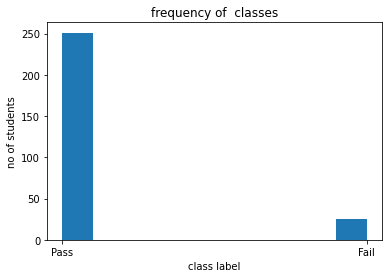

In [ ]:
#subplot to check for imbalance of output
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of students')

In [ ]:
#Changing target values to make data more balanced
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 15) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 9) & (data.G3 <=10), 'FinalGrade'] = 'Bad' 
data.loc[(data.G3 >= 0) & (data.G3 <= 8), 'FinalGrade'] = 'Fail' 
target = data['FinalGrade']
type(target[0])

str

In [ ]:
features

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,8,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,14,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,17,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,16,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,21,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,8,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,18,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,12,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
#Splitting data with the new balanced target values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0 , )

Text(0, 0.5, 'no of students')

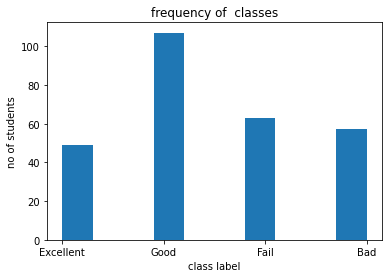

In [ ]:
#subplot to check for imbalance of target values
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of students')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa323ab70b8>,
      dtype=object)

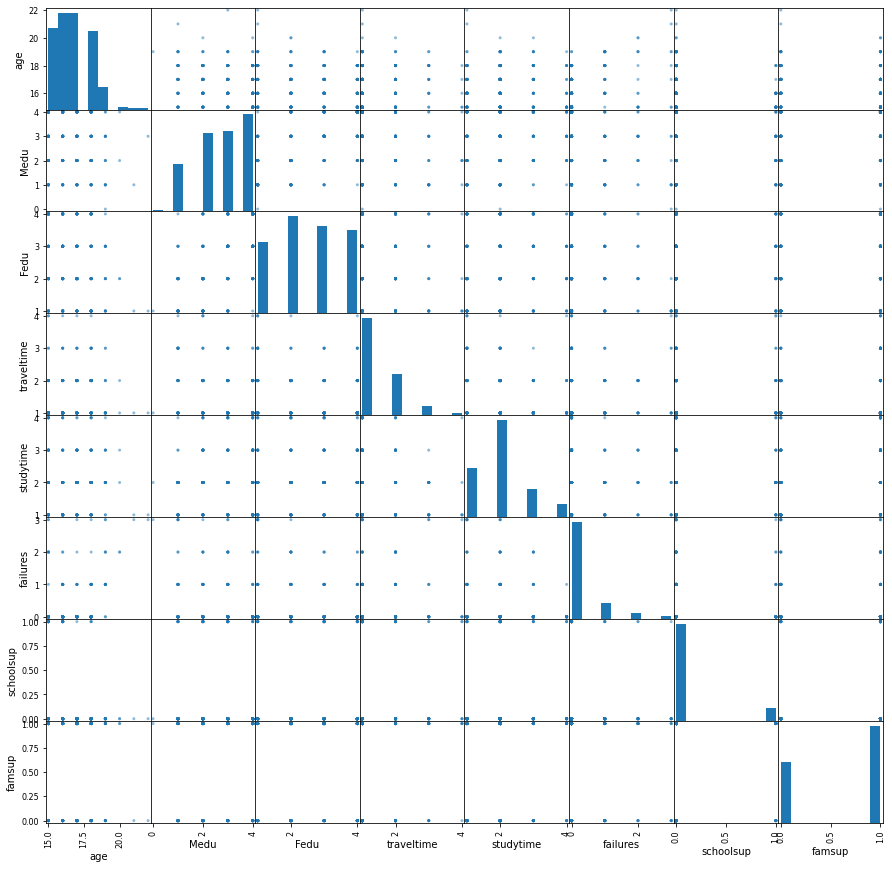

In [ ]:
# Scatter plot to check if the data is linearly separable
df_s = pd.DataFrame(X_train)
pd.plotting.scatter_matrix(df_s.iloc[:,0:8], figsize =  (15,15))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
train_predict(knn, X_train, y_train, X_test, y_test)




------------------------------------------
Training KNeighborsClassifier...
Training set size: 276
Score for training set:
0.7898550724637681
Score for test set:
0.6890756302521008


In [ ]:
#finding optimum number of neighbours for knn
k_list = list(range(1,50,2))

scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.score(X_test,y_test)
    score = knn.score(X_test,y_test)
    scores.append(score)

<Figure size 432x288 with 0 Axes>

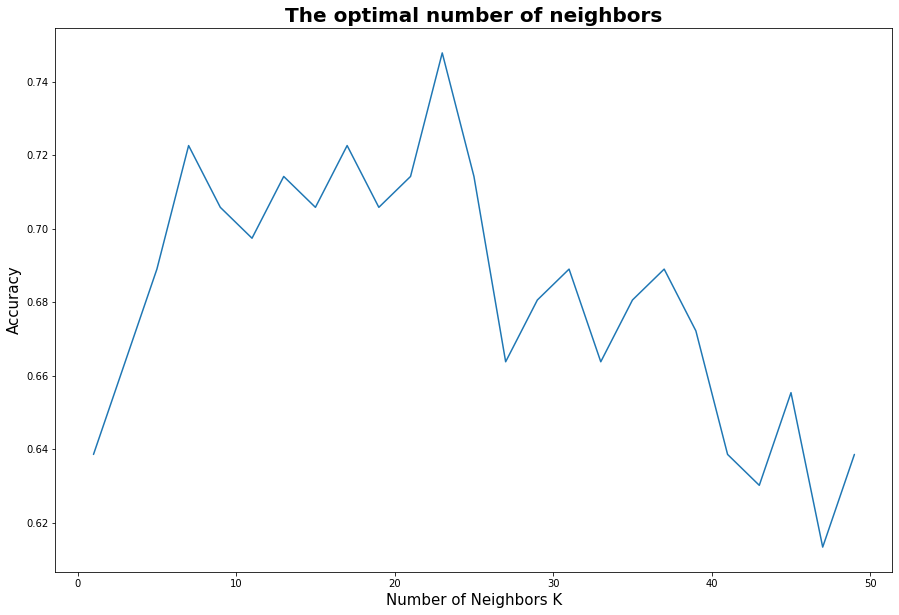

In [ ]:
#visual representation of accuracy vs no. of neighbours
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, scores)

plt.show()

In [ ]:
best_k = k_list[scores.index(max(scores))]
print("The optimal number of neighbors is {}".format(best_k))

The optimal number of neighbors is 23


In [ ]:
#Dataset with no G1 or G2--------------------------
features2 = features.drop(["G2"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0 , stratify = target )
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    features2, target, test_size=0.3, random_state=0 , stratify = target )

In [ ]:
#KNN on different sized sets with optimum number of neighbours
knn=KNeighborsClassifier(n_neighbors= 23)
knn2=KNeighborsClassifier(n_neighbors= 23)
#Training both dataset
train_predict(knn, X_train, y_train, X_test, y_test)
train_predict(knn2, X_train2, y_train2, X_test2, y_test2)

#Storing accuracy
knn_test_score = knn.score(X_test,y_test)
knn_train_score = knn.score(X_train,y_train)
knn_test_score2 = knn2.score(X_test2,y_test2)
knn_train_score2 = knn2.score(X_train2,y_train2)

------------------------------------------
Training KNeighborsClassifier...
Training set size: 276
Score for training set:
0.7717391304347826
Score for test set:
0.6722689075630253
------------------------------------------
Training KNeighborsClassifier...
Training set size: 276
Score for training set:
0.44565217391304346
Score for test set:
0.33613445378151263


In [ ]:
#Performaing Min-Max scaling for KNN

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_predict(knn, X_train_scaled, y_train, X_test_scaled, y_test)


------------------------------------------
Training KNeighborsClassifier...
Training set size: 276
Score for training set:
0.4528985507246377
Score for test set:
0.36134453781512604


In [ ]:
#Performaing Standard scaling for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_predict(knn, X_train_scaled, y_train, X_test_scaled, y_test)


------------------------------------------
Training KNeighborsClassifier...
Training set size: 276
Score for training set:
0.4746376811594203
Score for test set:
0.3865546218487395


In [ ]:
#Trying logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log2 = LogisticRegression(max_iter=10000)
#Training both dataset
train_predict(log,  X_train, y_train, X_test, y_test)
train_predict(log2,  X_train2, y_train2, X_test2, y_test2)
#Storing accuracy
log_test_score = log.score(X_test,y_test)
log_train_score = log.score(X_train,y_train)
log_test_score2 = log2.score(X_test2,y_test2)
log_train_score2 = log2.score(X_train2,y_train2)

------------------------------------------
Training LogisticRegression...
Training set size: 276
Score for training set:
0.9202898550724637
Score for test set:
0.7899159663865546
------------------------------------------
Training LogisticRegression...
Training set size: 276
Score for training set:
0.5760869565217391
Score for test set:
0.3697478991596639


In [ ]:
#Support vector machine model 
from sklearn import svm
sv = svm.SVC()
sv2 = svm.SVC()
#Training both dataset
train_predict(sv,  X_train, y_train, X_test, y_test)
train_predict(sv2,  X_train2, y_train2, X_test2, y_test2)
#Storing accuracy
sv_test_score = sv.score(X_test,y_test)
sv_train_score = sv.score(X_train,y_train)
sv_test_score2 = sv2.score(X_test2,y_test2)
sv_train_score2 = sv2.score(X_train2,y_train2)

------------------------------------------
Training SVC...
Training set size: 276
Score for training set:
0.7971014492753623
Score for test set:
0.7899159663865546
------------------------------------------
Training SVC...
Training set size: 276
Score for training set:
0.3804347826086957
Score for test set:
0.3865546218487395


In [ ]:
#Trying logistic regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log2 = LogisticRegression(max_iter=10000)
#Training both dataset
train_predict(log,  X_train, y_train, X_test, y_test)
train_predict(log2,  X_train2, y_train2, X_test2, y_test2)
#Storing accuracy
log_test_score = log.score(X_test,y_test)
log_train_score = log.score(X_train,y_train)
log_test_score2 = log2.score(X_test2,y_test2)
log_train_score2 = log2.score(X_train2,y_train2)

------------------------------------------
Training LogisticRegression...
Training set size: 276
Score for training set:
0.9202898550724637
Score for test set:
0.7899159663865546
------------------------------------------
Training LogisticRegression...
Training set size: 276
Score for training set:
0.5760869565217391
Score for test set:
0.3697478991596639


In [ ]:
#Decision tree model 
from sklearn import tree
des = tree.DecisionTreeClassifier()
des2 = tree.DecisionTreeClassifier()

#Training both dataset
train_predict(des, X_train, y_train, X_test, y_test)
train_predict(des2, X_train2, y_train2, X_test2, y_test2)
#Storing accuracy
des_test_score = des.score(X_test,y_test)
des_train_score = des.score(X_train,y_train)
des_test_score2 = des2.score(X_test2,y_test2)
des_train_score2 = des2.score(X_train2,y_train2)

------------------------------------------
Training DecisionTreeClassifier...
Training set size: 276
Score for training set:
1.0
Score for test set:
0.6974789915966386
------------------------------------------
Training DecisionTreeClassifier...
Training set size: 276
Score for training set:
1.0
Score for test set:
0.31932773109243695


In [ ]:
train_score=[knn_train_score, des_train_score,sv_train_score ,log_train_score ]
test_score=[knn_test_score, des_test_score,sv_test_score , log_test_score ]
train_score2=[knn_train_score2, des_train_score2,sv_train_score2 ,log_train_score2 ]
test_score2=[knn_test_score2, des_test_score2,sv_test_score2 , log_test_score2 ]

col={'Train Score':train_score,'Test Score':test_score}
models=['KNN','Decision Tree','SVM' , 'Logistic Regression']
df = pd.DataFrame(data=col,index=models)
col2={'Train Score':train_score2,'Test Score':test_score2}
models2=['KNN','Decision Tree','SVM' , 'Logistic Regression']
df2 = pd.DataFrame(data=col2,index=models2)
df

,Train Score,Test Score
KNN,0.771739,0.672269
Decision Tree,1.000000,0.697479
SVM,0.797101,0.789916
Logistic Regression,0.920290,0.789916


In [ ]:
df2

,Train Score,Test Score
KNN,0.445652,0.336134
Decision Tree,1.000000,0.319328
SVM,0.380435,0.386555
Logistic Regression,0.576087,0.369748


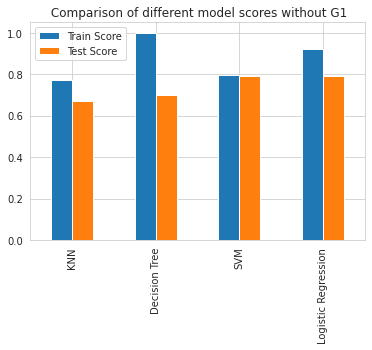

In [ ]:
df.plot(kind='bar' , title = " Comparison of different model scores without G1")

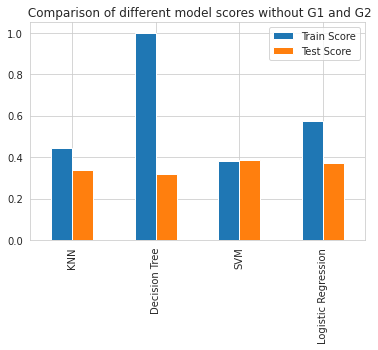

In [ ]:
df2.plot(kind='bar' ,title = " Comparison of different model scores without G1 and G2")